# 机器学习作业 1 - 线性回归

## 1.单变量线性回归

导入需要使用的包

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

导入数据集。提醒大家：一定要把数据文件ex1data1.txt放在和程序同一个文件夹里，否则需要使用绝对路径访问文件

In [7]:
path =  'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()  #预览数据

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [8]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


数据可视化，绘制散点图

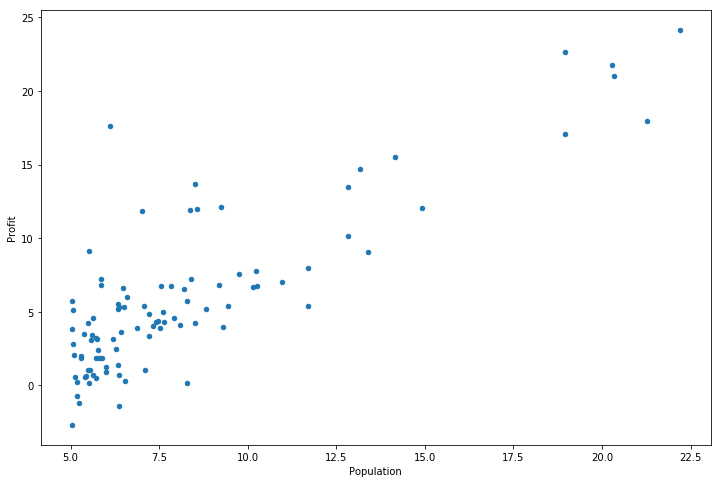

In [9]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化成本函数。 以下代码示例中实现的方程在“练习”文件夹中的“ex1.pdf”中有详细说明。

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [3]:
def computeCost(X, y, theta):
    # your code here  (appro ~ 2 lines)
    m = y.shape[0]
    cost = np.dot((X.dot(theta.T)-y).T, (X.dot(theta.T)-y)) / (2*m)
    return cost

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [10]:
data.insert(0, 'Ones', 1)

现在我们来做一些变量初始化。

In [14]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#X是所有行，最后一列
print(type(y))
print(y)

<class 'pandas.core.frame.DataFrame'>
      Profit
0   17.59200
1    9.13020
2   13.66200
3   11.85400
4    6.82330
5   11.88600
6    4.34830
7   12.00000
8    6.59870
9    3.81660
10   3.25220
11  15.50500
12   3.15510
13   7.22580
14   0.71618
15   3.51290
16   5.30480
17   0.56077
18   3.65180
19   5.38930
20   3.13860
21  21.76700
22   4.26300
23   5.18750
24   3.08250
25  22.63800
26  13.50100
27   7.04670
28  14.69200
29  24.14700
..       ...
67   7.77540
68   1.01730
69  20.99200
70   6.67990
71   4.02590
72   1.27840
73   3.34110
74  -2.68070
75   0.29678
76   3.88450
77   5.70140
78   6.75260
79   2.05760
80   0.47953
81   0.20421
82   0.67861
83   7.54350
84   5.34360
85   4.24150
86   6.79810
87   0.92695
88   0.15200
89   2.82140
90   1.84510
91   4.29590
92   7.20290
93   1.98690
94   0.14454
95   9.05510
96   0.61705

[97 rows x 1 columns]


观察下 X (训练集) and y (目标变量)是否正确.

In [143]:
X.head()#head()是观察前5行

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [144]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta，即把theta所有元素都设置为0.

In [145]:
X = np.matrix(X.values)
y = np.matrix(y.values)
# your code here  (appro ~ 1 lines)
theta = np.matrix([0, 0])

theta 是一个(1,2)矩阵

In [148]:
theta

matrix([[0, 0]])

看下维度

In [149]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算代价函数 (theta初始值为0).

In [182]:
computeCost(X, y, theta)

matrix([[32.07273388]])

# 2.batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [167]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.shape[1])
    cost = np.zeros(iters)
    m = y.shape[0]
    
    for i in range(iters):
        # your code here  (appro ~ 1 lines)
        cost[i] = computeCost(X,y,theta)
        for j in range(parameters):
            # your code here  (appro ~ 2 lines)
            delta = np.dot(X[:,j].T, X.dot(theta.T)-y)
            temp[0,j] = theta[0,j] - alpha * delta / m
        # your code here  (appro ~ 2 lines)    
        theta = temp
        temp = np.matrix(np.zeros(theta.shape))
        
        
    return theta, cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [162]:
alpha = 0.01
iters = 1000

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [184]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g
cost

array([32.07273388,  6.73719046,  5.93159357,  5.90115471,  5.89522859,
        5.89009494,  5.88500416,  5.87993248,  5.87487909,  5.86984391,
        5.86482687,  5.85982789,  5.85484692,  5.84988389,  5.84493874,
        5.8400114 ,  5.83510181,  5.8302099 ,  5.82533562,  5.82047889,
        5.81563965,  5.81081784,  5.8060134 ,  5.80122627,  5.79645638,
        5.79170367,  5.78696808,  5.78224955,  5.77754801,  5.77286341,
        5.76819568,  5.76354477,  5.75891061,  5.75429313,  5.7496923 ,
        5.74510803,  5.74054027,  5.73598897,  5.73145406,  5.72693549,
        5.72243319,  5.71794711,  5.71347718,  5.70902336,  5.70458558,
        5.70016379,  5.69575792,  5.69136792,  5.68699373,  5.6826353 ,
        5.67829257,  5.67396548,  5.66965398,  5.665358  ,  5.6610775 ,
        5.65681242,  5.6525627 ,  5.64832829,  5.64410913,  5.63990517,
        5.63571635,  5.63154261,  5.62738391,  5.6232402 ,  5.6191114 ,
        5.61499748,  5.61089837,  5.60681403,  5.60274441,  5.59

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [185]:
computeCost(X, y, g)

matrix([[4.5159555]])

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

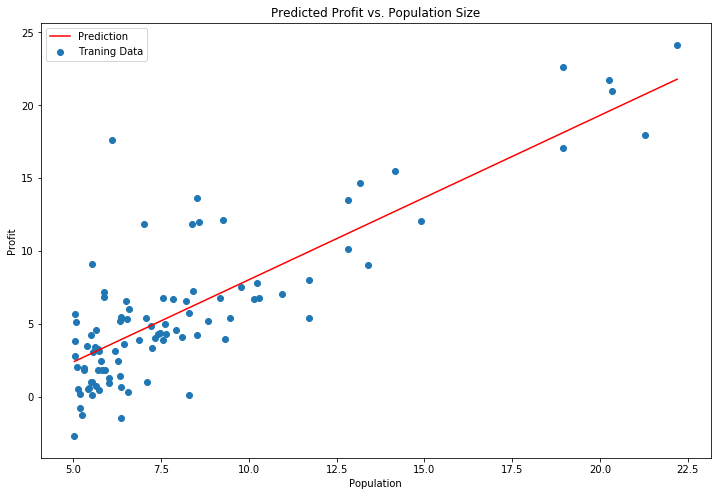

matrix([[-3.24140214,  1.1272942 ]])

In [198]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()
g

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

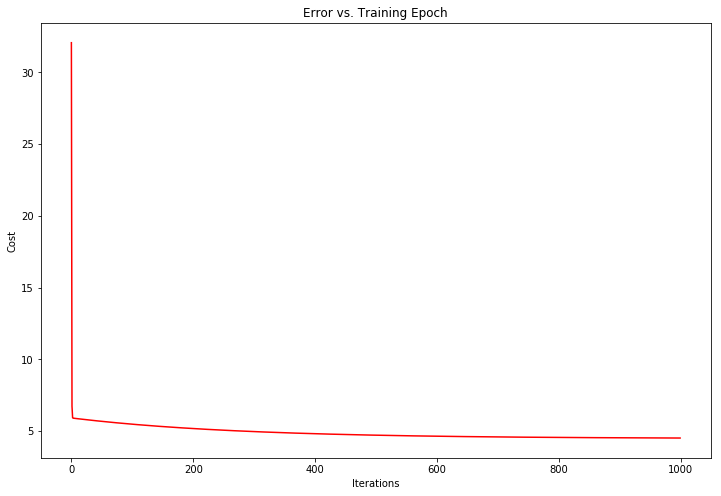

In [306]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 3.多变量线性回归

练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [331]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

In [332]:
cols = data2.shape[1]
data2.iloc[:,0:cols-1] = (data2.iloc[:,0:cols-1] - data2.iloc[:,0:cols-1].mean()) / data2.iloc[:,0:cols-1].std()
# data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,399900
1,-0.504190,-0.223675,329900
2,0.502476,-0.223675,369000
3,-0.735723,-1.537767,232000
4,1.257476,1.090417,539900


In [313]:
from sklearn.linear_model import LinearRegression
data2

,Ones,Size,Bedrooms,Price
0,NaN,0.130010,-0.223675,0.475747
1,NaN,-0.504190,-0.223675,-0.084074
2,NaN,0.502476,-0.223675,0.228626
3,NaN,-0.735723,-1.537767,-0.867025
4,NaN,1.257476,1.090417,1.595389
5,NaN,-0.019732,1.090417,-0.323998
6,NaN,-0.587240,-0.223675,-0.204036
7,NaN,-0.721881,-0.223675,-1.130948
8,NaN,-0.781023,-0.223675,-1.026973
9,NaN,-0.637573,-0.223675,-0.783051


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [309]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

matrix([[2.04354422e+09]])

我们也可以快速查看这一个的训练进程。

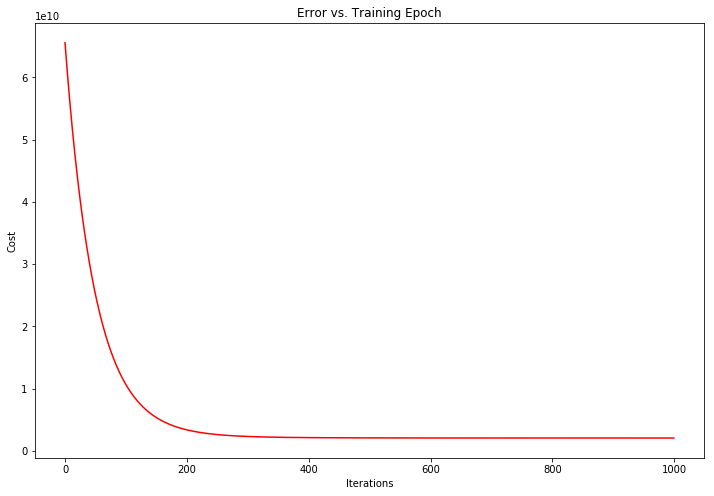

In [310]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 4. normal equation（正规方程）(选做)
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [195]:
# 正规方程
def normalEqn(X, y):
    # your code here  (appro ~ 1 lines)
    theta = np.linalg.inv(X.T*X) * X.T * y
    return theta

In [196]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

In [172]:
#梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])

In [200]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<class 'numpy.ndarray'>


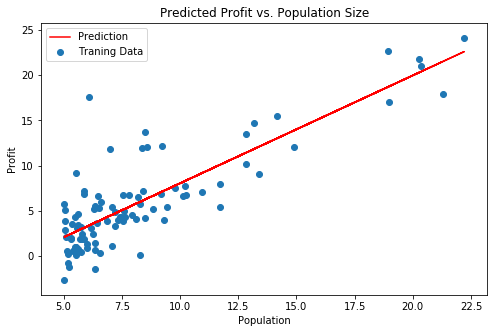

In [316]:
x = np.array(X[:, 1].A1)
print(type(x))
f = model.predict(X).flatten()
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

[[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
   5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
   6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
  10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
   8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
   7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
   6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
  14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
   6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
   5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
   5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]]
0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
5      8.3829
6      7.4764
7      8.5781
8      6.4862
9      5.0546
10     5.7107
11    14.1640
12     5.7340
13     8.4084
14    

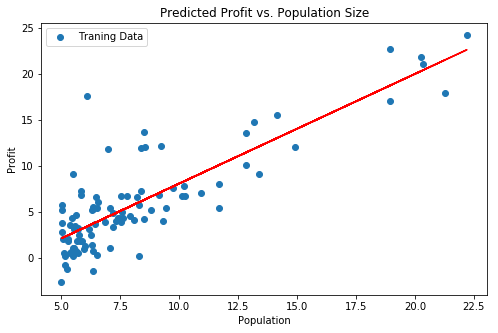

In [317]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
data_new = pd.read_csv("ex1data1.txt", header=None, names=["Population", "Profit"])
# data_x = data["Population"]
# data_y = data["Profit"]
data_x = data_new.iloc[:,0]
data_y = data_new.iloc[:,1]
lr.fit(np.matrix(data_x), np.matrix(data_y))
print(np.matrix(data_x))
fig, ax = plt.subplots(figsize=(8,5))
#ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

ax.plot(data_x, pre_y, 'r')
print(data_x)

In [337]:
from sklearn.linear_model import LinearRegression
data_x = data2.iloc[:,0:2]
data_y = data2.iloc[:,2]
print(type(data_x), type(data_y))
print(data_x.shape, data_y.shape)
model2 = LinearRegression()
model2.fit(data_x, data_y)
predict_y = model2.predict(data_x)
print(predict_y)
print(data_x)
print(data_y)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(47, 2) (47,)
[356283.1103389  286120.93063401 397489.46984812 269244.1857271
 472277.85514636 330979.02101847 276933.02614885 262037.48402897
 255494.58235014 271364.59918815 324714.54068768 341805.20024107
 326492.02609913 669293.21223209 239902.98686016 374830.38333402
 255879.96102141 235448.2452916  417846.48160547 476593.38604091
 309369.11319496 334951.62386342 286677.77333009 327777.17551607
 604913.37413438 216515.5936252  266353.01492351 415030.01477434
 369647.33504459 430482.39959029 328130.30083656 220070.5644481
 338635.60808944 500087.73659911 306756.36373941 263429.59076914
 235865.87731365 351442.99009906 641418.82407778 355619.31031959
 303768.43288347 374937.34065726 411999.63329673 230436.66102696
 190729.36558116 312464.00137413 230854.29304902]
        Size  Bedrooms
0   0.130010 -0.223675
1  -0.504190 -0.223675
2   0.502476 -0.223675
3  -0.735723 -1.537767
4   1.257476  1.090417
5  -0.01973

在练习2中，我们将看看分类问题的逻辑回归。